<a href="https://colab.research.google.com/github/Bushrashafique748/model-evaluation/blob/main/model_evaluation3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import load_iris  # for importing iris-dataset which is available in this laibrary
from sklearn.model_selection import train_test_split, cross_val_score  # use this to split data for training and testing model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Load the dataset

iris = load_iris() # here we simply call function to load iris dataset
X = iris.data   #( Features (input data) like sepal length, sepal width, petal length, petal width...which are the measurments of the iris flowers
                # this line assign features to variable "x" ).

y = iris.target  # (target labels (output data) like Setosa, Versicolor, Virginica ... which are flower species
                 # this line  assigns these labels to the variable y.)


# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# now train the classification model using logistic regression model

model = LogisticRegression(max_iter=200)



In [7]:
# Perform k-fold cross-validation (k=5) and calculate accuracy scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Report mean and standard deviation of cross-validation accuracy
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_accuracy:.4f}")


Mean Cross-Validation Accuracy: 0.9733
Standard Deviation of Cross-Validation Accuracy: 0.0249


#Why Cross-Validation is Important in Model Evaluation....





**Robust Performance Estimate:**
Provides a reliable estimate of model performance on independent data.

**Mitigates Overfitting:**
Detects overfitting by revealing discrepancies between training and validation performance.

**Model Selection and Tuning:**
Facilitates comparison of models and hyperparameters to select the best configuration.

**Variance and Stability Assessment:**
Assesses performance consistency with mean accuracy and standard deviation.

**Utilizes Data Efficiently:**
Maximizes data use, ensuring each point is used for training and validation.








In [3]:
# now we will make predictions and calculate matrics
# prediction.....
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# calculate marics like accuracy, precision, recall, and F1-score....

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


**Accuracy (1.0):** means 100% of the predictions are correct, meaning the model has classified all test samples accurately.

**Precision (1.0):** means All predicted positives are correct, indicating no false positives.

**Recall (1.0):** means All actual positives are correctly identified, meaning no false negatives.

**F1-Score (1.0):** means Perfect balance between precision and recall, showing ideal performance.

These metrics tells that our model performs well on the test set, with high accuracy, precision, recall, and F1-score, suggesting it is effective at making correct predictions and identifying positive instances.

In [7]:
# confusion matric interpretation......
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#Explanation of each value.....


**[10, 0, 0]:** All 10 instances of Setosa are correctly predicted as Setosa.
**[0, 9, 0]:** 9 instances of Versicolor are correctly predicted as Versicolor.
**[0, 0, 11]:** All 11 instances of Virginica are correctly predicted as Virginica.

**How the Confusion Matrix Helps in Understanding the Model's Performance.....**

The confusion matrix is a powerful tool for evaluating a classification model. It provides:

**Overall Accuracy:** Shows correct and incorrect predictions. Here, diagonal values (10, 9, 11) indicate mostly correct classifications.

**Class-Specific Performance:** Diagonal values reveal performance for each class, showing perfect results for Setosa and Virginica, and near-perfect for Versicolor.

**Error Analysis:** Off-diagonal values indicate errors. No false positives or negatives for Setosa and Virginica, but one false negative for Versicolor.

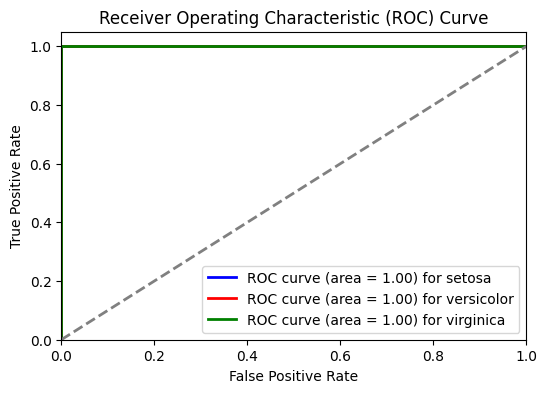

AUC values:
setosa: 1.00
versicolor: 1.00
virginica: 1.00


In [19]:
# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(6, 4))
colors = ['blue', 'red', 'green']
for i, color in zip(range(len(iris.target_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for {iris.target_names[i]}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC values
print("AUC values:")
for i, name in enumerate(iris.target_names):
    print(f"{name}: {roc_auc[i]:.2f}")


#How these metrics help in evaluating model's performance....


These metrics, namely **ROC curve** and **AUC** (Area Under the Curve), help in evaluating a model's performance by providing insights into its ability to discriminate between classes:

**ROC Curve:**

**Visualization of Performance:** Shows how well the model separates true positives from false positives across different thresholds.

**Model Comparison:** Helps compare different models visually; better models have curves closer to the top-left corner

**AUC (Area Under the Curve):**

**Single Metric Evaluation:** Provides a single score (0 to 1) summarizing overall model performance.

**Quantitative Assessment:** Higher AUC values indicate better classification ability; 0.5 means no better than random, 1.0 means perfect classification.